In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

In [21]:
seq=np.array([i for i in range(1,101)])
window_size=3

In [22]:
x=[]
y=[]
for i in range(len(seq)-window_size):
    x.append(seq[i:i+window_size])
    y.append(seq[i+window_size])

In [23]:
x=np.array(x)
y=np.array(y)
x=x.reshape((x.shape[0],x.shape[1],1))

In [24]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.fit(x,y,epochs=1500,verbose=0)
print("trained")

trained


In [33]:
test_input=np.array([8,9,10])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input,verbose=0)
print(f"Predicted next number: {predicted[0][0]:.2f}")

Predicted next number: 11.00


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


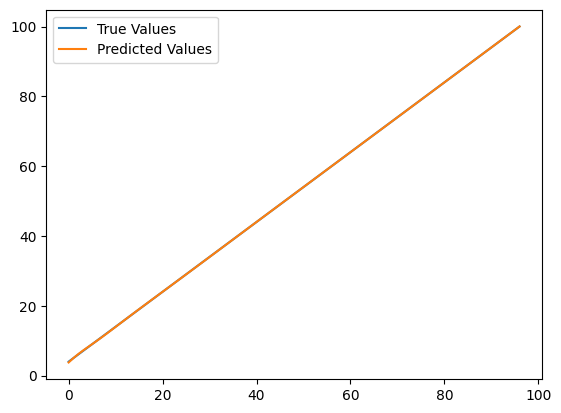

In [27]:
predictions=model.predict(x)
plt.plot(y,label='True Values')
plt.plot(predictions,label='Predicted Values')
plt.legend()
plt.show()